# Chapter 6 - 행렬 응용: 데이터 분석에서의 행렬

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [9]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

## 공분산과 상관 행렬 연습 문제

### 6-1. 공분산 행렬을 상관 행렬로 변환

In [13]:
datamean = np.mean(dataMat, axis=0)     # 특징 평균 벡터
dataMatM = dataMat - datamean           # 브로드캐스트를 이용한 평균 중앙화
covMat = dataMatM.T @ dataMatM          # 데이터 행렬의 전치와 데이터 행렬의 곱
covMat /= (dataMatM.shape[0] - 1)       # N-1로 나누기

In [32]:
# 직접 구한 공분산 행렬 (책에 있는 코드)
covMat

array([[ 0.01610509, -0.00095881,  0.00743543, ...,  0.0078588 ,
         0.01422331,  0.01085579],
       [-0.00095881,  0.02680317, -0.00278454, ..., -0.00193146,
        -0.00371296, -0.00133207],
       [ 0.00743543, -0.00278454,  0.06423288, ...,  0.008535  ,
         0.0158847 ,  0.03727496],
       ...,
       [ 0.0078588 , -0.00193146,  0.008535  , ...,  0.0524661 ,
         0.01137541,  0.00820928],
       [ 0.01422331, -0.00371296,  0.0158847 , ...,  0.01137541,
         0.05775768,  0.01952064],
       [ 0.01085579, -0.00133207,  0.03727496, ...,  0.00820928,
         0.01952064,  0.05428196]])

In [35]:
# numpy를 이용한 공분산 행렬 구하기
# 열이 변수이기 때문에, rowvar=False가 된다
np.cov(dataMat, rowvar = False)

# covMat과 np.cov(dataMat, rowvar = False) 동일하다

array([[ 0.01610509, -0.00095881,  0.00743543, ...,  0.0078588 ,
         0.01422331,  0.01085579],
       [-0.00095881,  0.02680317, -0.00278454, ..., -0.00193146,
        -0.00371296, -0.00133207],
       [ 0.00743543, -0.00278454,  0.06423288, ...,  0.008535  ,
         0.0158847 ,  0.03727496],
       ...,
       [ 0.0078588 , -0.00193146,  0.008535  , ...,  0.0524661 ,
         0.01137541,  0.00820928],
       [ 0.01422331, -0.00371296,  0.0158847 , ...,  0.01137541,
         0.05775768,  0.01952064],
       [ 0.01085579, -0.00133207,  0.03727496, ...,  0.00820928,
         0.01952064,  0.05428196]])

In [58]:
# 변수의 역 표준편차의 대각 행렬 구하기

# 공분산 행렬의 대각성분 : 분산
var = np.diag(covMat)

# 분산에 루트 씌움 : 표준편차
std = np.sqrt(var)

# 1/표준편차로 대각 행렬 만든다
S = np.diag(1 / std)

corrMat = S @ covMat @ S
corrMat

array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
         0.46635229,  0.36715738],
       [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
        -0.09436752, -0.0349226 ],
       [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
         0.26079264,  0.63126363],
       ...,
       [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
         0.20664393,  0.15382885],
       [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
         1.        ,  0.34862726],
       [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
         0.34862726,  1.        ]])

In [48]:
# numpy를 이용한 상관 행렬 구하기
# 열이 변수이기 때문에, rowvar=False가 된다
np.corrcoef(dataMat, rowvar=False)

# corrMat과 np.corrcoef(dataMat, rowvar=False) 동일함

array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
         0.46635229,  0.36715738],
       [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
        -0.09436752, -0.0349226 ],
       [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
         0.26079264,  0.63126363],
       ...,
       [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
         0.20664393,  0.15382885],
       [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
         1.        ,  0.34862726],
       [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
         0.34862726,  1.        ]])

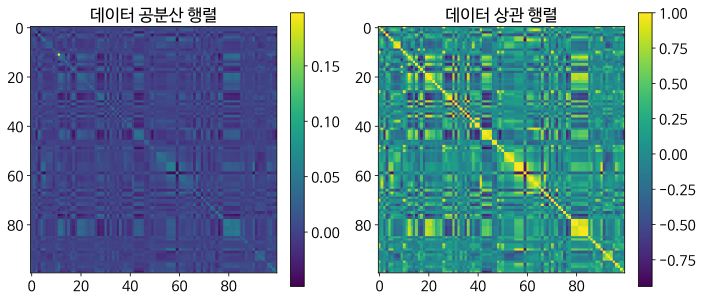

In [87]:
# 공분산 행렬, 상관 행렬 시각화

# 1*2 크기의 subplots 생성
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

cov_corr_lists = [covMat, corrMat]
title_lists = ["데이터 공분산 행렬", "데이터 상관 행렬"]

# for loop를 이용하여 각 subplot에 그래프 생성
for i, ax in enumerate(axs):
    cax = ax.imshow(cov_corr_lists[i],
                    # origin='lower',
                    # vmin=np.min(ranges),
                    # vmax=np.max(ranges),
                    # extent=(ranges[0],ranges[-1],ranges[0],ranges[-1])
                    )
    # ax.set_xlabel("A의 계수")
    # ax.set_ylabel("B의 계수")
    
    # colorbar 추가
    fig.colorbar(cax, ax=ax, fraction=0.05)

    ax.set_title(title_lists[i])

plt.tight_layout()
plt.show()

### 6-2. np.corrcoef() 함수와 앞서 구한 상관 행렬 차이 확인하고 두 행렬이 동일한지 확인

In [66]:
# numpy를 이용한 상관 행렬 구하기
# 열이 변수이기 때문에, rowvar=False가 된다
np_corr = np.corrcoef(dataMat, rowvar=False)
np_corr

array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
         0.46635229,  0.36715738],
       [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
        -0.09436752, -0.0349226 ],
       [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
         0.26079264,  0.63126363],
       ...,
       [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
         0.20664393,  0.15382885],
       [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
         1.        ,  0.34862726],
       [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
         0.34862726,  1.        ]])

In [69]:
# 차이 행렬 구하기
diffMat = np_corr - corrMat
diffMat

array([[-2.22044605e-16,  6.93889390e-18,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.38777878e-17, -2.22044605e-16,  0.00000000e+00, ...,
         6.93889390e-18,  0.00000000e+00, -6.93889390e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.77555756e-17,  0.00000000e+00, -1.11022302e-16],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -2.77555756e-17, ...,
        -2.22044605e-16,  0.00000000e+00,  2.77555756e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.11022302e-16,  5.55111512e-17],
       [ 0.00000000e+00, -6.93889390e-18,  0.00000000e+00, ...,
         2.77555756e-17,  0.00000000e+00,  0.00000000e+00]])

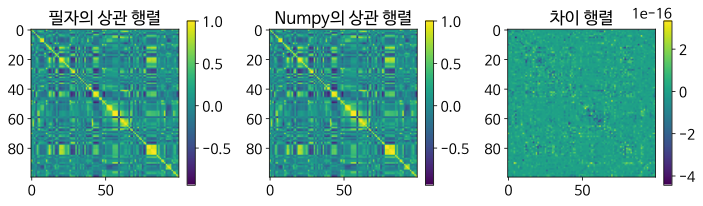

In [88]:
# 상관 행렬, numpy 상관 행렬, 차이 행렬 시각화

# 1*2 크기의 subplots 생성
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

corr_diff_lists = [corrMat, np_corr, diffMat]
title_lists = ["필자의 상관 행렬", "Numpy의 상관 행렬", "차이 행렬"]

# for loop를 이용하여 각 subplot에 그래프 생성
for i, ax in enumerate(axs):
    cax = ax.imshow(corr_diff_lists[i],
                    # origin='lower',
                    # vmin=np.min(ranges),
                    # vmax=np.max(ranges),
                    # extent=(ranges[0],ranges[-1],ranges[0],ranges[-1])
                    )
    # ax.set_xlabel("A의 계수")
    # ax.set_ylabel("B의 계수")
    
    # colorbar 추가
    fig.colorbar(cax, ax=ax, fraction=0.05)

    ax.set_title(title_lists[i])

plt.tight_layout()
plt.show()

## 기하학적 변환 연습 문제

### 6-3. 변환을 적용하기 전과 후의 원안의 점 그래프 만들기

In [89]:
T = np.array([[1, .5],
              [0, .5]])

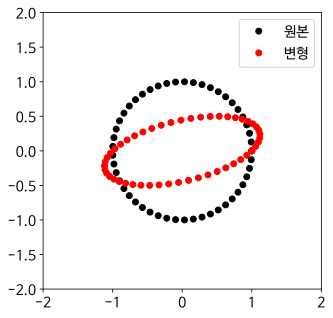

In [110]:
# np.linspace(구간 시작점, 구간 끝점, 구간 내 숫자 개수)
theta = np.linspace(0, 2*np.pi, 50)

# np.sin(theta) : y = sin x 의 그래프
# np.cos(theta) : y = cos x 의 그래프

# np.vstack()을 통해 np.cos(theta) , np.sin(theta) 수직으로 결합
points = np.vstack((np.cos(theta), np.sin(theta)))

# T행렬 T를 사용하여 변환된 행렬 
points_transformed = T @ points

plt.figure(figsize=(5, 5))

# cos^2(theta) + sin^2(theta) = 1이기 때문에, 
# plt.plot(points[0, :], points[1, :]) 넣으면 원 그래프 나온다

plt.plot(points[0, :], points[1, :], "ko", label="원본")
plt.plot(points_transformed[0, :], points_transformed[1, :], "ro", label="변형")

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.legend()
plt.show()